# **Ejemplo 1**
 Realiza la segmentación watershed utilizando opencv de la imagen coins.png


Text(0.5, 1.0, 'Prediction + Original')

<Figure size 432x288 with 0 Axes>

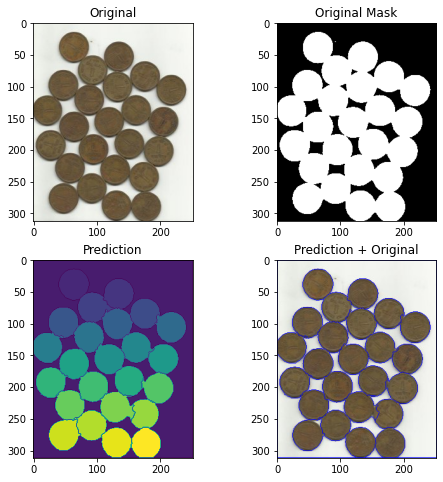

In [16]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


original = np.copy(img)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure()
f, axarr = plt.subplots(2, 2)
f.set_size_inches(8, 8)
axarr[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axarr[0, 0].set_title("Original")
axarr[0, 1].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
axarr[0, 1].set_title("Original Mask")
axarr[1, 0].imshow(markers)
axarr[1, 0].set_title("Markers after segmentation")
axarr[1, 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1, 1].set_title("Final segmentation")

